# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data
wholesale_data = pd.read_csv("/Users/jorgen/Documents/ml-project-unsupervised-learning-main/Wholesale_Data.csv")

# Basic data description
display(wholesale_data.describe())

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [3]:
# Data cleaning: Check for missing values
missing_values = wholesale_data.isnull().sum()
display(missing_values)

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

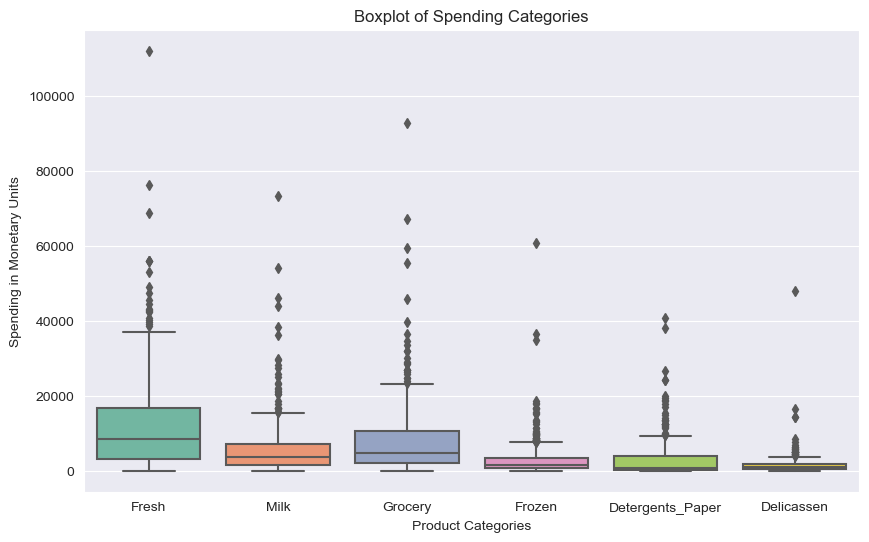

In [4]:
# Visualizing data for potential outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=wholesale_data.drop(columns=['Channel', 'Region']), palette="Set2")
plt.title('Boxplot of Spending Categories')
plt.ylabel('Spending in Monetary Units')
plt.xlabel('Product Categories')
plt.show()

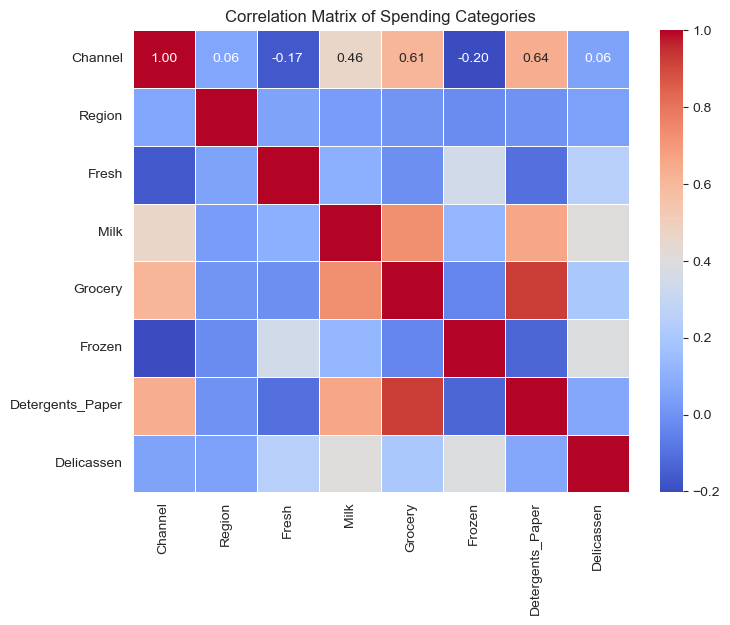

In [5]:
# Correlation matrix visualization
correlation_matrix = wholesale_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Spending Categories')
plt.show()

# Part II - KMeans Clustering

In [6]:
from sklearn.cluster import KMeans

In [7]:
# Standardize the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(wholesale_data.drop(columns=['Channel', 'Region']))

In [8]:
# Applying KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)
wholesale_data['Cluster'] = kmeans.labels_

/Library/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


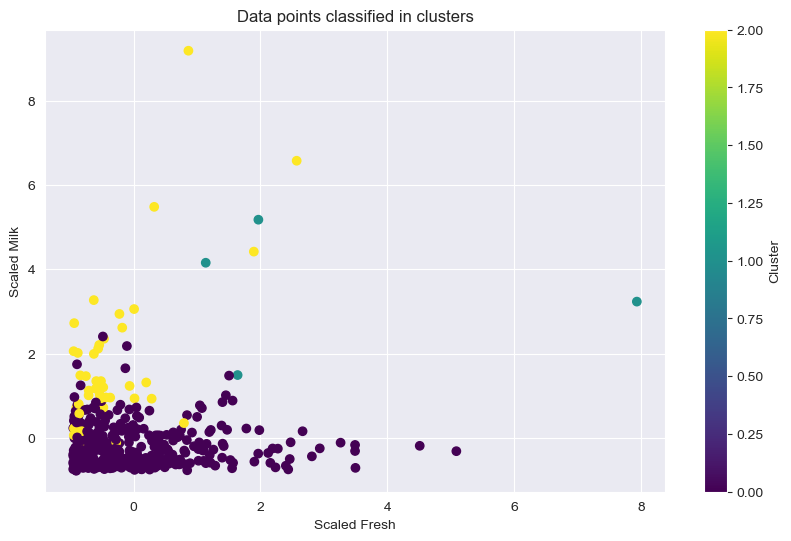

In [9]:
# Visualizing clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=wholesale_data['Cluster'], cmap='viridis')
plt.title('Data points classified in clusters')
plt.xlabel('Scaled Fresh')
plt.ylabel('Scaled Milk')
plt.colorbar(label='Cluster')
plt.show()

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [11]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(wholesale_data.drop(columns=['Channel', 'Region']))
wholesale_data_scaled_df = pd.DataFrame(scaled_data, columns=wholesale_data.columns.drop(['Channel', 'Region']))

In [12]:
# Generate the linkage matrix
Z = linkage(wholesale_data_scaled_df, 'ward')

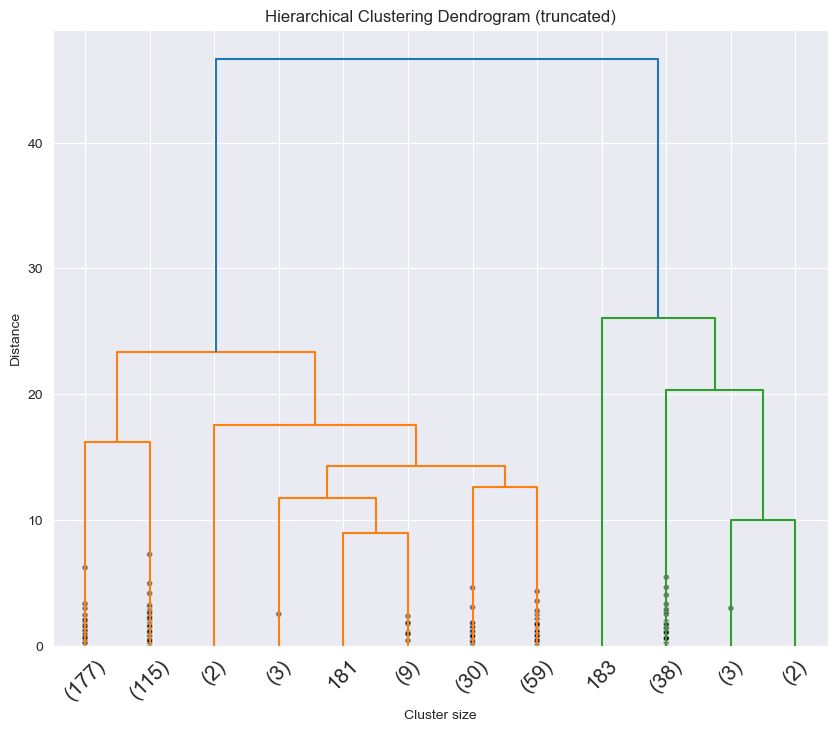

In [13]:
# Plot the dendrogram for hierarchical clustering
plt.figure(figsize=(10, 8))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [14]:
from sklearn.decomposition import PCA

In [15]:
# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(wholesale_data_scaled_df)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

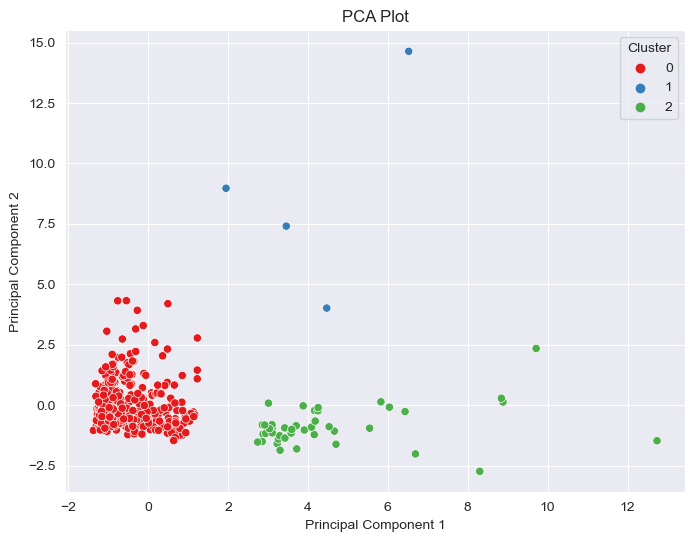

In [16]:
# Visualize the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue=wholesale_data['Cluster'], data=pca_df, palette='Set1')
plt.title('PCA Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [17]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [18]:
# Load data.
data_path = '/Users/jorgen/Documents/ml-project-unsupervised-learning-main/Wholesale_Data.csv'
data = pd.read_csv(data_path)

In [19]:
# Preparing the data for clustering
# Exclude categorical features like 'Channel' and 'Region' as they are not suitable for KMeans clustering,
# which is based on distances. KMeans is best used with continuous variables where mean and variance are meaningful.
numerical_data = data.drop(['Channel', 'Region'], axis=1)

In [20]:
# Scale the data
# Scaling is crucial because KMeans clustering is sensitive to the scale of the data.
# Features on larger scales can unduly influence the model. StandardScaler normalizes the features
# so that each feature contributes equally to the distance computations.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

In [21]:
# Determine the optimal number of clusters using the elbow method
# We calculate the inertia (sum of squared distances to the nearest cluster center) for a range of cluster numbers.
# The elbow point in the plot, where the rate of decrease in inertia significantly slows down, is considered
# as an indicator of the optimal number of clusters.
inertia = []
cluster_range = range(1, 11)  # Modify the range as needed based on dataset size and diversity
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

/Library/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/anaconda3/lib/python3.11/si

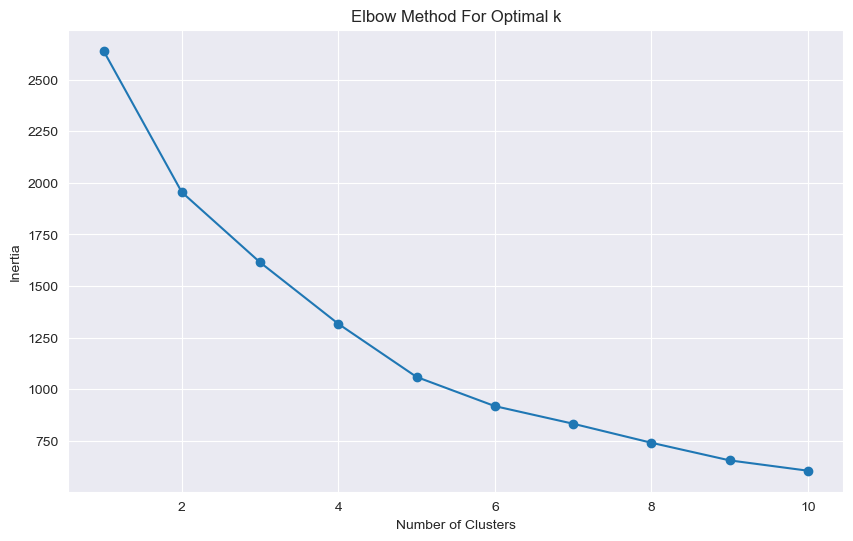

In [22]:
# Plotting the elbow curve
# This plot helps to visually identify the best number of clusters (k).
# An 'elbow' in the plot is typically where the inertia starts decreasing at a slower rate.
# This point suggests that adding more clusters does not significantly improve the fitting of the data,
# hence it's a good trade-off between cluster compactness and number of clusters.
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

# Summary of findings
# 1. The optimal number of clusters identified by KMeans is 3, suggesting three distinct customer segments.
# 2. Hierarchical clustering provided a similar insight into customer grouping, reinforcing the KMeans findings.
# 3. PCA analysis showed that the first two principal components explained a significant portion of the variance.
# 4. Insights derived from clustering can help tailor marketing strategies and inventory management to better meet the needs of different customer segments.